### Spec: Nosaic MNIST
**Num of datapoints**

ALL	    70,000

TRAIN	60,000

TEST	10,000

**Features**

'image': shape=(20, 28, 28, 1), dtype=tf.uint8

'label': shape=(), dtype=tf.int64, num_classes=10

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

def set_gpu_devices(gpu):
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
    tf.config.experimental.set_visible_devices(physical_devices[gpu], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[gpu], True)
    
set_gpu_devices(0)

In [4]:
dstr, dsts = tfds.load(
    name="mnist", 
    data_dir="/data-directory/tensorflow_datasets", # arbitrary
    split=["train", "test"], 
    batch_size=-1)
dstr["image"] = dstr["image"].numpy()
dsts["image"] = dsts["image"].numpy()
dstr["label"] = dstr["label"].numpy()
dsts["label"] = dsts["label"].numpy()

In [5]:
image = dstr["image"][0]
label = dstr["label"][0]

original image

In [59]:
image_reshape = np.reshape(image, [28,28])
PIL.Image.fromarray(image_reshape, "L")

### nosaic generator

In [8]:
bkgd = np.array([255]*784, dtype=np.uint32)
idx_perm = np.random.permutation(len(bkgd))
idx_perm_split = [idx_perm[40*k: 40*k+40] for k in range(0, 20)] 
    # len(idx_perms)=20, len(idx_perms[n]=40 and 28 for n<19 and n=19)

In [9]:
masks = [None]*20

# Make masks
for i, offsets in enumerate(idx_perm_split):
    if i == 0:
        masks[i] = bkgd - 0
    else:
        masks[i] = masks[i-1] - 0 
    masks[i][offsets] = masks[i][offsets] - 255
    
# Reshape
for i, mask in enumerate(masks):
    masks[i] = np.reshape(mask, (28,28))

In [10]:
masked_images = [None]*20

image_org = np.uint32(image_reshape)

for i, mask in enumerate(masks):
    masked_images[i] = np.uint8(np.clip(image_org + mask, 0, 255))

nosaic image at the 10th frame

In [11]:
# Show 1
PIL.Image.fromarray(masked_images[10], "L")

nosaic image at the 10th frame: larger

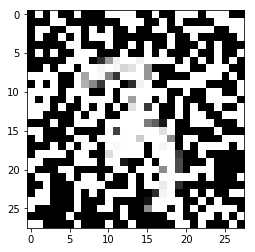

In [12]:
# Show 2
imgplot = plt.imshow(masked_images[10], cmap='gray')

Nosaic MNIST

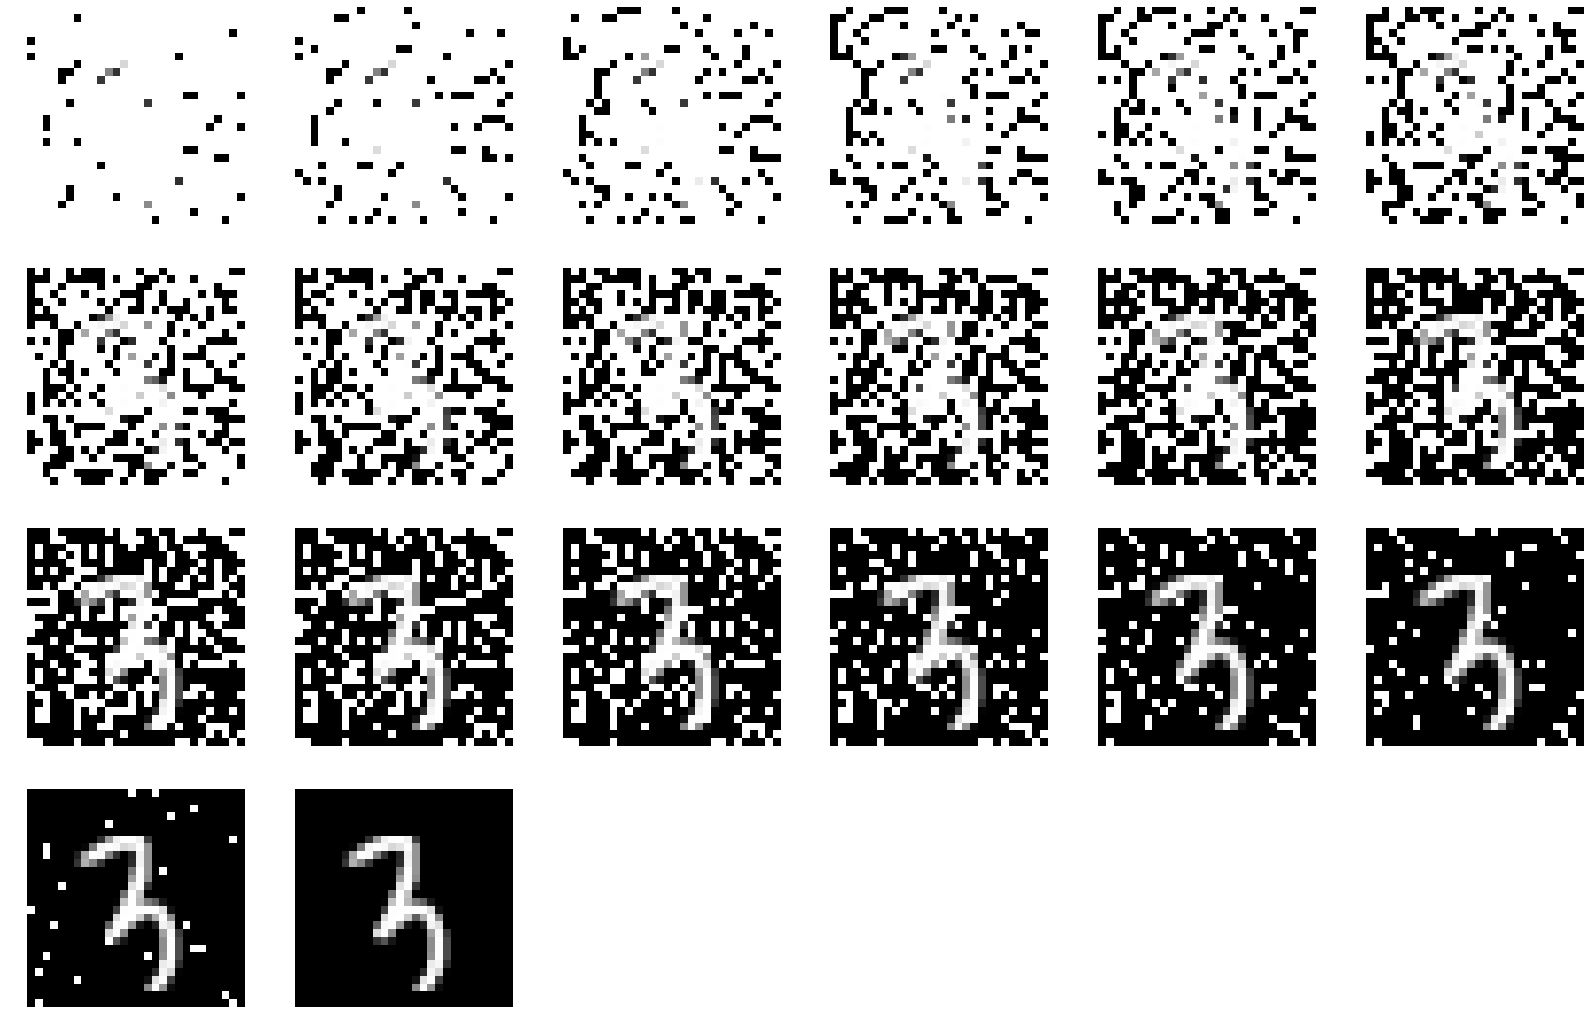

In [13]:
# Show 3
fig = plt.figure(figsize=(28, 28), facecolor="w")
for i, img in enumerate(masked_images):
    ax = fig.add_subplot(6, 6, i+1)
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()

plt.show()